<a href="https://colab.research.google.com/github/kalviyarasi/Task-1/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**


# **Task 1-Prediction using Supervised ML**

In [ ]:
#importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to read the data 
input=pd.read_csv('http://bit.ly/w-data')
input.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#to show the total numer of rows and columns in database
input.shape

(25, 2)

In [4]:
#to know datatype of each column
input.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
#to check the presence of any null values
input.isnull==True

False

### **This confirms that there is no NULL values in the given dataset**

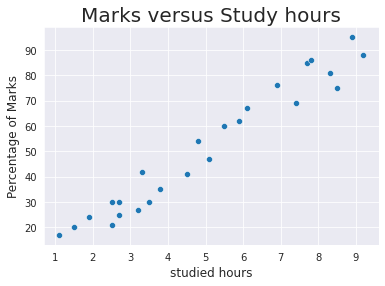

In [6]:
sns.set_style('darkgrid')
sns.scatterplot(y=input['Scores'],x=input['Hours'])
plt.title('Marks versus Study hours',size=20)
plt.ylabel('Percentage of Marks',size=12)
plt.xlabel('studied hours',size=12)
plt.show()

## **From the plot, we could see the correlation between the percentage of marks versus studied hours**

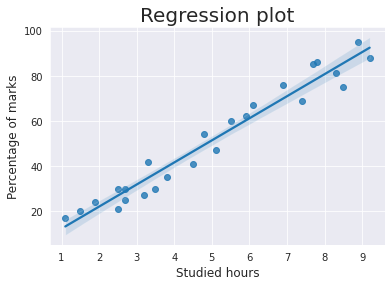

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(x=input['Hours'],y=input['Scores'])
plt.title('Regression plot',size=20)
plt.ylabel('Percentage of marks',size=12)
plt.xlabel('Studied hours',size=12)
plt.show()
print(input.corr())

# **1.Training the Model**



**i)Importing the required libraries to train the model**


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**ii)splitting the data**

In [9]:
X=input.iloc[:,:-1].values
Y=input.iloc[:,1].values
train_X,val_X,train_Y,val_Y=train_test_split(X,Y,random_state=0)

**iii)Fitting the data into the model**

In [10]:
regression=LinearRegression()
regression.fit(train_X,train_Y)
print("......THE TRAINED MODEL......")

......THE TRAINED MODEL......


# **2.Predicting the percentage of Marks**

In [11]:
pred_y=regression.predict(val_X)
prediction=pd.DataFrame({'Hours':[i[0] for i in val_X],'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# **3.comparing the Predicted marks with Actual marks**

In [12]:
compare_scores = pd.DataFrame({'Actual Marks':val_Y,'Predicted Marks':pred_y})
compare_scores


,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# **4.Comparing the Predicted marks with Actual marks in visual representation**

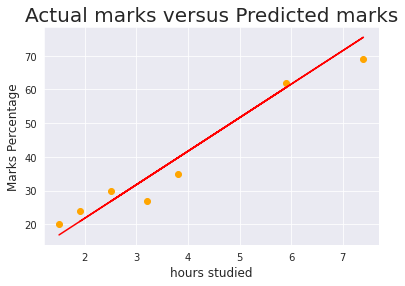

In [13]:
plt.scatter(x=val_X,y=val_Y,color='Orange')
plt.plot(val_X,pred_y,color='Red')
plt.title('Actual marks versus Predicted marks',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('hours studied',size=12)
plt.show()

# **5.Calculating the accuracy of the model**

In [ ]:
print('Mean absolute error: ',mean_absolute_error(val_Y,pred_y))

Mean absolute error:  4.130879918502482


**we could see that,mean absolute error is small. hence the chances of wrong forecasting through the model are very less.**

# **What will be the predicted score of a student if he/she studies for 9.25 hours per day**

In [ ]:
hours=[9.25]
answer=regression.predict([hours])
print("Predicted_Score=",format(round(answer[0],3)))

Predicted_Score= 93.893


## **we could infer that,if a student studies for 9.25 hours a day he/she is likely to score 93.893 marks according to our regression model**